# Lab 2 #

Tianhao Jiang

Importing Libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
from scipy import stats
from scipy import signal

## Problem 1 ##

In lecture and homework we explored how the convolution can be used to calculate the probability of a sum or average. For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.

To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).

**A) Show how the probability distribution of the background changes as you integrate (sum) for more days.**

**B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.**


I assumed in 1 day the average cosmic-ray background was X = 0.5; and the average number of gamma-rays emitted by my hypothetical source was Y = 2.
The number of days N I picked was 6. 

Below, I plotted the distribution resulting from summing over n days and $Possion(\lambda = 0.5  n)$ for values of $n$ ranging from 1 to 6.

In [2]:
lam = 0.5 # lambda
max_k = int(stats.poisson.ppf(stats.norm.cdf(5), lam, 0))
k1 = range(0, max_k + 1)
p1 = stats.poisson.pmf(k1, lam, 0)

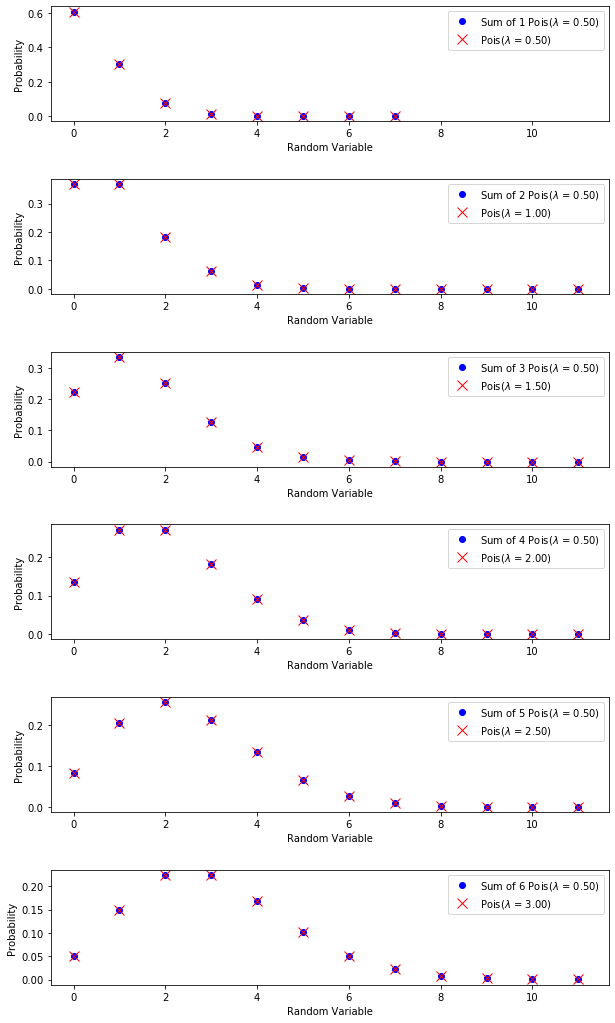

In [3]:

n_col = 1
max_days = 6
n_row = math.ceil(max_days / n_col)
f, axs = plt.subplots(n_row, n_col, figsize=(10, 3 * n_row))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)
xlim = max_days*lam + 5 * math.sqrt(max_days*lam)
p = 1
for i in range(0, max_days):
        p = np.convolve(p, p1)
        days = len(p) - 1
        if (n_col == 1):
            ax = axs[i]
        else:
            ax = axs[math.floor(i / n_col), i % n_col]
        k = range(0, days + 1)
        ax.set_xlim([-0.5, xlim])
        #ax.set_yscale("log")
        ax.set_xlabel('Random Variable')
        ax.set_ylabel('Probability')
        summed, = ax.plot(k, p, 'ob')
        reference, = ax.plot(k,stats.poisson.pmf(k, lam * (i+1), 0), 'xr', markersize = 10)
        summed.set_label("Sum of %d Pois($\lambda$ = %.2f)" % ((i + 1), lam))
        reference.set_label('Pois($\lambda$ = %.2f)' %  (float(i+1) * lam))
        ax.legend()

As shown, as the number of days summed over increases, the resulting distribution moves to the right and becomes wider (not apparent).

Also, in each graph, the distribution calculated from summing over days (blue dots) and the referene Possion distributions (red crosses) overlap perfectly. And they follow the rule such that the sum of n Pois($\lambda$ = 0.5) equals Pois($\lambda$ = 0.5n).

This makes sense conceptually. For example, say we have two types of events, A and B, that are independent of each other. And assume that on any 1-day interval, A and B are expected to happen $\lambda_1$ and $\lambda_2$ times, respectively, on average. Then, if we count the number of events from both A and B, anyone would agree that we would expect on average of $(\lambda_1+\lambda_2)$ events per day.

The rule can also be proved mathematically:

\begin{align}
 p(k;\lambda_1) * p(k;\lambda_2)
= & \sum_{k'=0}^k p(k';\lambda_1) p(k - k';\lambda_2)\\
= & \sum_{k'=0}^k \frac{\lambda_1^{k'} e^{-\lambda_1}}{k'!} \frac{\lambda_1^{k-k'} e^{-\lambda_2}}{(k-k')!}\\
= & \frac{(\lambda_1+\lambda_2)^{k} e^{-(\lambda_1+\lambda_2)}}{k!}\\
= & p(k;\lambda_1 + \lambda_2))
\end{align}

**C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theorem.**

Below I plotted the graphs for A) and B) again but changed the horizontal axis from the number of events in n days, where n ranged from 1 to 6, to the average number of events of one day, which basically means dividing the horizontal axis by n and multiplying the vertical axis by n.

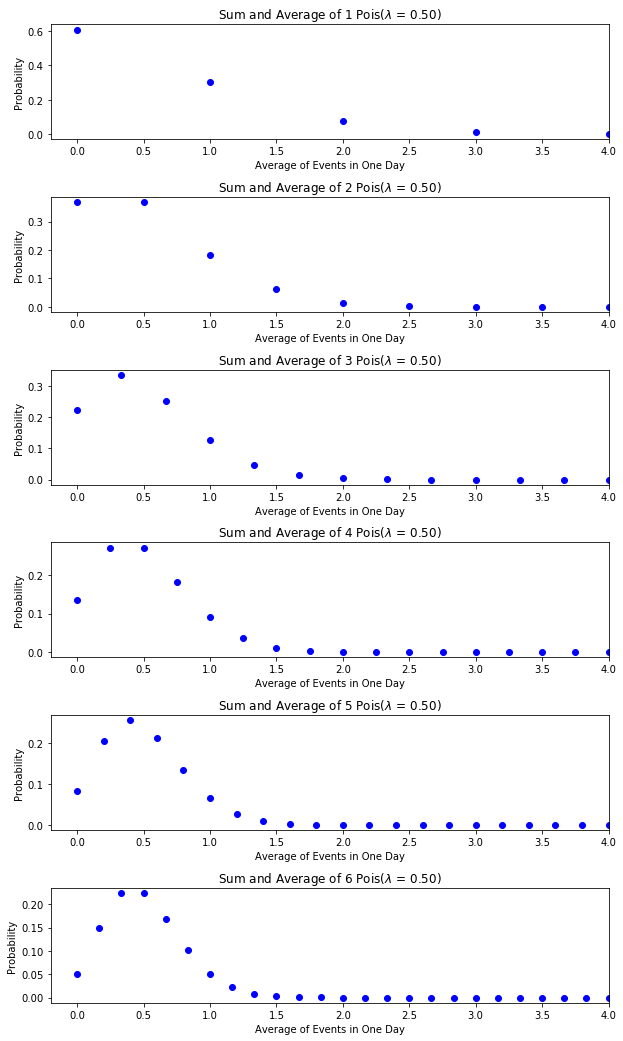

In [4]:
n_col = 1
max_days = 6
n_row = math.ceil(max_days / n_col)
f, axs = plt.subplots(n_row, n_col, figsize=(10, 3 * n_row))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)
p = 1
for i in range(0, max_days):
        p = np.convolve(p, p1)
        days = len(p) - 1
        if (n_col == 1):
            ax = axs[i]
        else:
            ax = axs[math.floor(i / n_col), i % n_col]
        k = np.array(np.arange(0, days + 1))
        ax.set_xlim([-0.2, 4])
        ax.set_xlabel('Average of Events in One Day')
        ax.set_ylabel('Probability')
        ax.plot(k / (i + 1), p, 'ob')
        ax.set_title("Sum and Average of %d Pois($\lambda$ = %.2f)" % ((i + 1), lam))

As shown, as the number of days summed over increases, the distribution's mean stays the same, and its width decreases, as opposed to the increasing width in part B).

The distribution is also becoming more and more like a gaussian as the number of days increases, which agrees with the central limit theroem.

**D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]**

Calculation is done below in Python.

In [5]:
avg_observed = 2
p = 1 - stats.poisson.cdf(avg_observed * max_days, lam * max_days, 0)
sigma = -stats.norm.ppf(p, loc = 0, scale = 1)
print("I assumed that I saw %d * %d = %d gamma rays from my source in %d days." % (avg_observed, max_days, avg_observed * max_days, max_days))
print("The 'sigma' I get is %f." % sigma)

I assumed that I saw 2 * 6 = 12 gamma rays from my source in 6 days.
The 'sigma' I get is 4.156627.


## Problem 2 ##


Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.

**A) Show how the distribution changes as you average over more observing intervals.**

**B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?**

I chose the Rayleigh distribution. 

I made log-linear plots of n Rayleigh($\sigma$ = 1) summed together with n ranging from 8 to 80.

I chose an observing interval of (0,10) since a the PDF of a Rayleigh distribution is 0 when x < 0 and is very close to 0 when it's $\sigma$ = 1 and its x > 10.

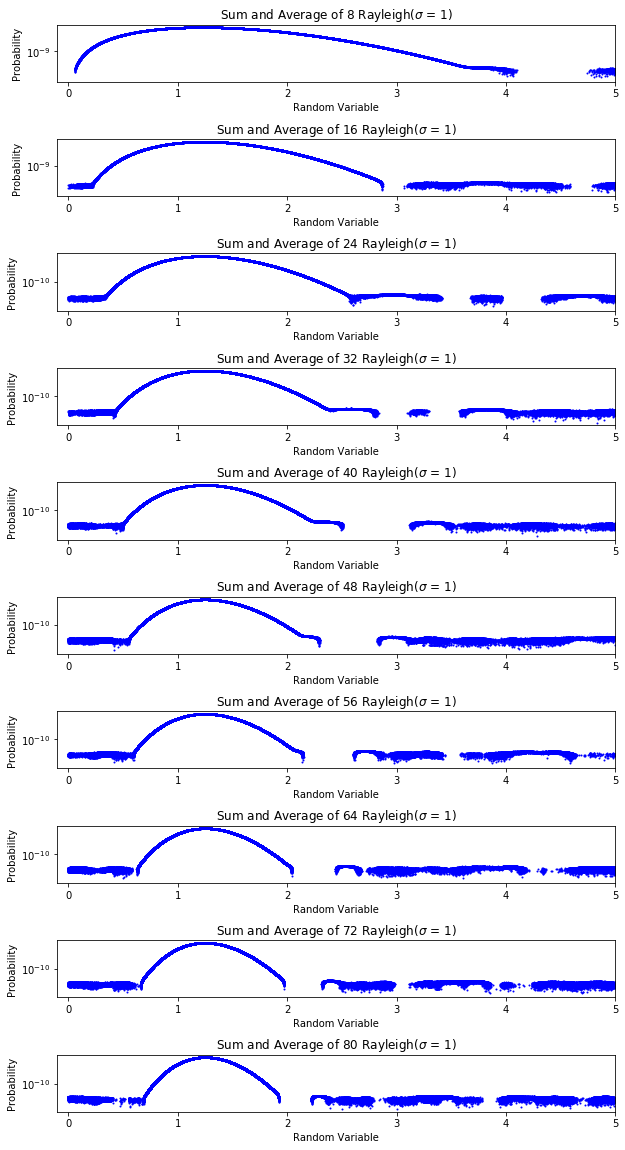

In [6]:
#Rayleigh

delta = 1e-3
x1 = np.arange(0,10 + delta,delta)
pdf1 = stats.rayleigh.pdf(x1, loc = 0, scale = 1)
sum(pdf1)
f, axs = plt.subplots(10, 1, figsize=(10, 20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
pdf2 = signal.fftconvolve(pdf1, pdf1) * delta
pdf4 = signal.fftconvolve(pdf2, pdf2) * delta
pdf8 = signal.fftconvolve(pdf4, pdf4) * delta

pdf = pdf8
for i in range(0, 10):
        if (i > 0):
            pdf = signal.fftconvolve(pdf, pdf8) * delta
        ax = axs[i]
        x = np.arange(0, 80*(i+1) + delta,delta)
        ax.set_xlim([-0.1, 5])
        ax.set_xlabel('Random Variable')
        ax.set_ylabel('Probability')
        ax.set_yscale("log")
        ax.plot(x/(8*(i+1)), pdf*(8*(i+1)), 'ob', markersize = 1)
        ax.set_title("Sum and Average of %d Rayleigh($\sigma$ = 1)" % (8*(i+1)))


#conv_pdf = signal.fftconvolve(pdf1, pdf2, 'same') * delta

As expected, as we sum and average more Rayleigh distributions, the mean of the distributions stay the same, and the width of distributions decrease. 

With the y-axis in log scale, we also see that the distribution curve becomes less skewed and looks more and more like a quadratic functions as we sum and average more distributions, which means the curves are approaching Gaussian distributions.

By looking at the graphs, I would say the resulting distribution alreay looks pretty much like a Gaussian when it's summed and averaged from 24 Rayleigh($\lambda=1$), and it's very close to a Gaussian when it's summed and averaged from 80 Rayleigh($\lambda=1$).

## Problem 3 ##

You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in.

**A) From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?**

In [7]:
X = 1.2
Y = 8.76
print("I chose X = %.2f and Y = %.2f." % (X, Y))

prob = 1-stats.norm.cdf(Y,loc = 0, scale = X)
sigma = -stats.norm.ppf(prob, loc = 0, scale = 1)
print("The probability that my signal is noise is %.2e, which corresponds to %.2f-sigma." % (prob, sigma))

I chose X = 1.20 and Y = 8.76.
The probability that my signal is noise is 1.44e-13, which corresponds to 7.30-sigma.


My signal is more than 5-sigma, so I could claim a discovery.

You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.

**B) If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)**

I'm not sure what exactly B) is asking, 
but one qeustion that could be asked is:

Given that the background distribution on each pixel of of my CCD is a zero-mean Gaussian with a standard deviation of 1.2, what is the background distributions of the average of the background distribution within a 10k pixel region on my CCD?

As I have proved in HW2, the sum and average of n of the same Gaussian distributions $\mathcal{N}(\mu, \sigma^2)$ is $\mathcal{N}(\mu, \frac{1}{n}\sigma^2)$. In the case of this problem, $n = 10000$, $\mu = 0$, and $\sigma = 1.2$. So the summed and averaged background distribution I get is $\mathcal{N}(0, \frac{1}{10000} \cdot 1.2^2) = \mathcal{N}(0, 0.012^2)$.

**C) Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.**

Given: 
    
    The background distribution on each pixel of of my CCD is a zero-mean Gaussian with a standard deviation of 1.2;
    
    the brightest candidate signal I spot from a 10k pixel region on my CCD has a magnitude of 8.76.

My statistical question:

    Assume all my signals are from the background, and given the background, what is the probability that there is at least 1 pixel in my 10k pixels region that gives a signal with a magnitude equal to or larger than my candidate signal?

In [8]:
print("In only one pixel, the probability p that the background produces a signal not as large as my candidate signal Y = %.2f is" % Y)
print("(1-%.2e) (using the result from part A)).\n" % prob)
result = 1 - (1 - prob)**10000
print("The probability that the background  produces a signal larger than my candidate signal on at least one pixel in all the 10k pixel")
print("is (1 - p^10000) = %.2e, which is approximately 10000 times the probability I got from Part A).\n" % result)
sigma = -stats.norm.ppf(result, loc = 0, scale = 1)
print("This probability corresponds to %.2f-sigma, which is larger than 5-sigma. So I still can claim a discovery.\n" % sigma)

In only one pixel, the probability p that the background produces a signal not as large as my candidate signal Y = 8.76 is
(1-1.44e-13) (using the result from part A)).

The probability that the background  produces a signal larger than my candidate signal on at least one pixel in all the 10k pixel
is (1 - p^10000) = 1.44e-09, which is approximately 10000 times the probability I got from Part A).

This probability corresponds to 5.94-sigma, which is larger than 5-sigma. So I still can claim a discovery.



## Problem 4 ##

The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if you search through a million locations, you would expect to se ~1 one in a million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.

**A) Calculate the signal required for a 5-sigma detection in Version 1**

In [9]:
sigmas = 5
prob = stats.norm.cdf(5, loc = 0, scale = 1)
signal1 = stats.norm.ppf(prob, loc = 0, scale = X)
print("The signal required for a 5-sigma detection in Version 1 is %f." % signal1)

The signal required for a 5-sigma detection in Version 1 is 6.000000.


**B) Calculate the signal required for a 5-sigma detection in Version 2**

In [10]:
prob = stats.norm.cdf(5, loc = 0, scale = 1)
prob2 = prob**(1.0/10000)
signal2 = stats.norm.ppf(prob2, loc = 0, scale = X)
print("The signal required for a 5-sigma detection in Version 2 is %f." % signal2)

The signal required for a 5-sigma detection in Version 2 is 7.860645.


**C) Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.**

As shown in A) and B), if the trial factor is 1, then my signal needs to have a magnitude of 6.0 to reach 5-sigma; if the trial factor increases to 10k, then the magnitude of the signal would be required to icrease to 7.86 for discovery. This corresponding increase of magnitude is 1.86 or 31%. This amount required should decrease if my original signal gets larger than 5-sigma.

A normal distribution falls off very rapidly as its x value increases. Thus the integral of the CDF of a normal distribution from some value to infinity can decrease by orders of magnitude even if the interval of the integral is moved to the right by only a few percent.  

**D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?**


Below I plotted the minimum magnitude of signal requred to achieve 5-sigma given trials factors ranging from 1 to 10^10 with the trials factor in log scale on the left. On the right, I plotted the same thing but with the signal squared.

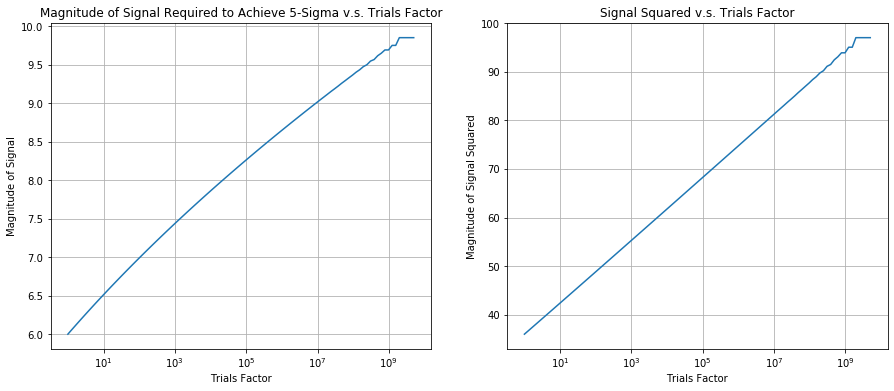

In [11]:
prob = stats.norm.cdf(5, loc = 0, scale = 1)
trials_factors = np.logspace(0,10,100)
prob2 = 1-(1-prob)/trials_factors
signal2 = stats.norm.ppf(prob2, loc = 0, scale = X)
f, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].set_xscale("log")
axs[0].plot(trials_factors, signal2)
axs[0].set_xlabel('Trials Factor')
axs[0].set_ylabel('Magnitude of Signal')
axs[0].set_title('Magnitude of Signal Required to Achieve 5-Sigma v.s. Trials Factor')   
axs[0].grid()

axs[1].set_xscale("log")
axs[1].plot(trials_factors, signal2**2)
axs[1].set_xlabel('Trials Factor')
axs[1].set_ylabel('Magnitude of Signal Squared')
axs[1].set_title('Signal Squared v.s. Trials Factor')   
axs[1].grid()
                     

As shown, the signal v.s. trials factor graph (left) is a bit curved. But if we square the signal and plot again, we can see that the
graph (on the right) looks like a straight line, with the squared signal increased by about 7 each time the trials factor is multiplied by 10. 

And it can be proven that, when the background is a zero-mean Gaussian distribution, we have

\begin{align}
\lim_{x\to\infty} \frac{ 2\sigma^2 ln(T) }{ x^2-x_0^2 } = 1.
\end{align}

where $T$ is the trials factor, $x_0$ is the smallest magnitude required for discovery when trials factor = 1, $x$ is the smallest magnitude required given the trials factor, and $\sigma$ is the standard deviation of the background.
